In [1]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12"]
#     data.drop(["x3", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16"], axis=1, inplace=True)
    print(data.shape)
    return data


import pandas as pd
import numpy as np




dataLeft = loadAndFormatData('sonarLogL.txt')
# print(dataLeft.head())
dataLeft1 = loadAndFormatData('sonarLogL1.txt')
dataLeft2 = loadAndFormatData('sonarLogL2.txt')
dataRight = loadAndFormatData('sonarLogR.txt')
dataRight1 = loadAndFormatData('sonarLogR1.txt')
dataRight2 = loadAndFormatData('sonarLogR2.txt')
dataMid = loadAndFormatData('sonarLogM.txt')
dataMid1 = loadAndFormatData('sonarLogM1.txt')
dataMid2 = loadAndFormatData('sonarLogM2.txt')

dataLeft = pd.concat([dataLeft, dataLeft1, dataLeft2], axis=0)
dataRight = pd.concat([dataRight, dataRight1, dataRight2], axis=0)
dataMid = pd.concat([dataMid, dataMid1, dataMid2], axis=0)



C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(2400, 12)
(2300, 12)
(2500, 12)
(2380, 12)
(2480, 12)
(2480, 12)
(2420, 12)
(2480, 12)
(2440, 12)


In [2]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
#     print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
dataLeft = movingAvg(dataLeft, winSize = 5)
dataRight = movingAvg(dataRight, winSize = 5)
dataMid = movingAvg(dataMid, winSize = 5)



In [3]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


dataLeft = removeOutliers(dataLeft)
dataRight = removeOutliers(dataRight)
dataMid = removeOutliers(dataMid)


('before removal: ', (7196, 12))
('after removal: ', (6588, 12))
('before removal: ', (7336, 12))
('after removal: ', (6423, 12))
('before removal: ', (7336, 12))
('after removal: ', (7062, 12))


In [4]:
def featureExtaction(df):
    result, header = [], []
    for ind in range(sum(range(df.shape[1]))):
        header.append("x{}".format(ind))
    
    for i in range(df.shape[0]):
        temp = []
        for j in range(len(df.iloc[i])-1):
            for k in range(j+1, len(df.iloc[i])):
                temp.append(df.iloc[i, j] - df.iloc[i, k])
        result.append(temp)    
    
#     print(len(result), len(temp), len(header), len(df.iloc[i]))
    return pd.DataFrame(result, columns=header)


# f_dataLeft = featureExtaction(dataLeftMA)
# f_dataRight = featureExtaction(dataRightMA)
# f_dataMid = featureExtaction(dataMidMA)


In [5]:
dataLeft.info()
dataLeft.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 12 columns):
x1     6588 non-null float64
x2     6588 non-null float64
x3     6588 non-null float64
x4     6588 non-null float64
x5     6588 non-null float64
x6     6588 non-null float64
x7     6588 non-null float64
x8     6588 non-null float64
x9     6588 non-null float64
x10    6588 non-null float64
x11    6588 non-null float64
x12    6588 non-null float64
dtypes: float64(12)
memory usage: 617.7 KB


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
count,6588.000000,6588.000000,6588.000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,0.558297,0.314483,65.529,0.906433,2.128857,0.991438,0.564682,0.399639,65.537460,0.899430,2.116858,0.992425
std,0.197911,0.262934,0.000,0.327587,0.773358,0.360843,0.202776,0.192637,0.026887,0.286859,0.680687,0.311274
min,0.267800,0.127000,65.529,0.554800,0.299800,0.503200,0.347606,0.165127,65.529310,0.581181,0.895397,0.630933
25%,0.355400,0.185000,65.529,0.583200,1.329600,0.735000,0.353696,0.267129,65.529310,0.582721,1.246263,0.697688
50%,0.507800,0.245400,65.529,0.843600,2.426300,0.851000,0.506579,0.320562,65.529310,0.843956,2.460778,0.879476
75%,0.823200,0.323000,65.529,1.099250,2.959000,1.255000,0.816761,0.476828,65.529475,1.173089,2.663866,1.362189
max,1.248000,2.044000,65.529,1.825800,2.959000,1.896600,0.976386,1.075088,65.714878,1.458712,2.946718,1.542321


In [6]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

# com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])
com_data, com_label = labelAndCombineData([dataLeft, dataRight, dataMid])

# print(com_data, com_label)

 

In [7]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params["std"][0])


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):  
        print(ind, feature_name, dataFrame[feature_name].dtype,  params["mean"][ind].dtype)
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / params["std"][ind]) if params["std"][ind] else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / (params["max"][ind] - params["mean"][ind])) if (params["max"][ind] - params["mean"][ind]) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - params["min"][ind]) / (params["max"][ind] - params["min"][ind])) if (params["max"][ind] - params["min"][ind]) else 0

    return result
    


(         x1        x2  x3        x4        x5        x6        x7        x8  \
0 -0.218808 -0.936805   0 -0.341353  0.646942  1.107796 -0.390427 -1.078383   
1 -0.218808 -0.931262   0 -0.342892  0.646942  1.738921 -0.390430 -1.079453   
2 -0.217499 -0.924486   0 -0.344431  0.875211  1.738113 -0.390415 -1.080433   
3 -0.216190 -0.877058   0 -0.344431  0.959836  1.737305 -0.390384 -1.080852   
4 -0.217499 -0.829630   0 -0.346355  1.044462  1.105373 -0.390370 -1.080715   

         x9       x10       x11       x12  
0  6.743786 -0.315768  1.262518  0.057671  
1  6.673135 -0.317747  1.257357  0.080559  
2  6.603243 -0.319728  1.254884  0.103208  
3  6.534043 -0.321689  1.253412  0.125618  
4  6.465527 -0.323660  1.252932  0.139211  , 0.30556166409209895)


In [8]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[  2.72580499e-01,   3.49071394e-01,  -0.00000000e+00,
          2.75048690e-01,  -3.64095035e-01,   7.61274385e-02,
          3.75328390e-01,   3.78726593e-01,   3.12300923e-03,
          3.65496666e-01,  -4.05318187e-01,   8.74702171e-02],
       [  1.89912963e-02,  -1.52398757e-01,  -2.77555756e-17,
          3.24962606e-01,   2.76199568e-01,   5.62310376e-01,
          1.09087950e-02,  -1.34939111e-01,  -7.81648828e-03,
          2.96662261e-01,   2.32675663e-01,   5.63736614e-01],
       [  6.18452778e-01,  -4.70147624e-01,  -1.11022302e-16,
         -1.59824146e-01,  -1.22290698e-01,  -2.90727092e-02,
          4.12933111e-01,  -4.01298297e-01,  -3.62215712e-02,
         -1.18347641e-01,  -8.68805264e-02,   2.67003430e-02]]), 3, array([ 0.38301412,  0.21684755,  0.10211095]), array([ -3.39820170e-16,  -1.58582746e-16,   0.00000000e+00,
        -1.07609720e-16,   0.00000000e+00,   1.81237424e-16,
         1.58582746e-16,  -4.53093559e-17,   7.96966084e-13,
         1.58582

<IPython.core.display.Javascript object>


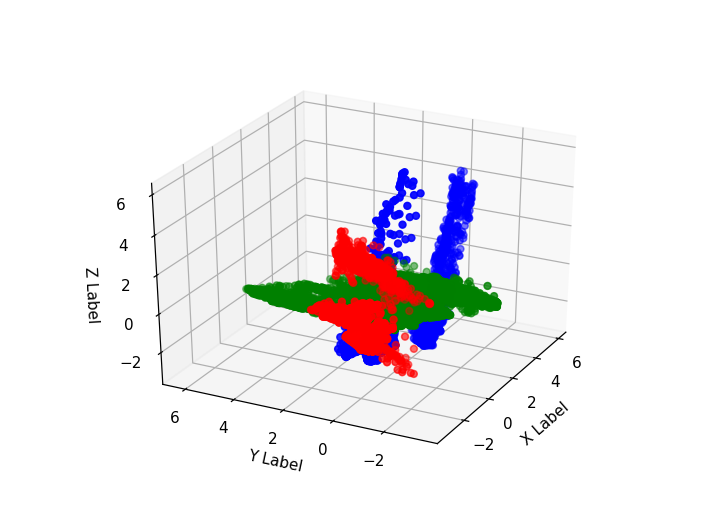

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [31]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e-1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=40)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


0.787824440791
             precision    recall  f1-score   support

          0       0.74      0.81      0.77      6588
          1       0.83      0.74      0.78      6423
          2       0.81      0.81      0.81      7062

avg / total       0.79      0.79      0.79     20073



In [11]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')    
    dataMA = movingAvg(data,  winSize = 5)
    dataNorm = normalizeTestDF(dataMA, params)
    with open("prediction.txt", "a") as myfile:
        for i in range(dataNorm.shape[0]):
            current = dataNorm.iloc[i].values.reshape(1, -1)
#             print(current, str(logreg.predict(current)[0]))
            myfile.write(str(logreg.predict(current)[0]))
    
# makePredction()

In [12]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
# segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
# segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



NameError: name 'dataLeftMA' is not defined

In [ ]:
com_seg_data, com_seg_label = labelAndCombineData([segL_MA, segR_MA, segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data, params = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 